In [ ]:
# Install necessary packages
#install.packages("readxl")
install.packages("lme4")
install.packages("effects")

# Load the packages
#library(readxl)  # For reading Excel files
library(lme4)    # For linear mixed-effects models
library(effects) # For visualizing effects


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘mitools’, ‘RcppArmadillo’, ‘carData’, ‘survey’, ‘estimability’, ‘insight’


Loading required package: Matrix

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [ ]:

install.packages("devtools") # Devtools is a package which allows to do this.
devtools::install_github("dustinfife/flexplot")

library(flexplot) # load the flexplot package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




zoo         (NA -> 1.8-13) [CRAN]
sandwich    (NA -> 3.1-1 ) [CRAN]
TH.data     (NA -> 1.1-3 ) [CRAN]
multcomp    (NA -> 1.4-28) [CRAN]
mvtnorm     (NA -> 1.3-3 ) [CRAN]
modeltools  (NA -> 0.2-23) [CRAN]
matrixStats (NA -> 1.5.0 ) [CRAN]
libcoin     (NA -> 1.0-10) [CRAN]
coin        (NA -> 1.4-3 ) [CRAN]
strucchange (NA -> 1.5-4 ) [CRAN]
party       (NA -> 1.3-18) [CRAN]
ggsci       (NA -> 3.2.0 ) [CRAN]
patchwork   (NA -> 1.3.0 ) [CRAN]
plyr        (NA -> 1.8.9 ) [CRAN]
cowplot     (NA -> 1.1.3 ) [CRAN]


Installing 15 packages: zoo, sandwich, TH.data, multcomp, mvtnorm, modeltools, matrixStats, libcoin, coin, strucchange, party, ggsci, patchwork, plyr, cowplot

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpNbvEQr/remotesf9581f099c/dustinfife-flexplot-93072a0/DESCRIPTION’ ... OK
* preparing ‘flexplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘flexplot_0.22.5.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Step 2: Load the Excel file into R


In [ ]:
#Load File
file_path <- "R_repeated_measures_2clusters.csv"
data <- read.csv(file_path)

#We only want to follow people for upto 6 years (72 months)
data_filtered <- data[data$FUMonths >= 0 & data$FUMonths <= 75,]


data_filtered$cluster_factor <- factor(data_filtered$cluster, levels = c(0, 1), labels = c("converter", "stable"))
data_filtered$sex_factor <- factor(data_filtered$sex_1f, levels = c(0, 1), labels = c("male", "female"))
data_filtered$baseline_diag <- factor(data_filtered$baseline_diag, levels = c('CN', 'MCI', 'AD'), labels = c('CN', 'MCI', 'AD'))




head(data_filtered)

,RID,MMSE,CDR,FUMonths,cluster,age,sex_1f,baseline_diag,cluster_factor,sex_factor
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<fct>,<fct>,<fct>
1,0047_ADNI,30,0.0,0.00000,0,90,0,CN,converter,male
2,0051_ADNI,23,0.5,0.00000,0,72,0,AD,converter,male
3,0051_ADNI,26,1.0,16.16427,0,72,0,AD,converter,male
4,0051_ADNI,24,1.0,27.59139,0,72,0,AD,converter,male
5,0051_ADNI,20,1.0,41.86858,0,72,0,AD,converter,male
6,0051_ADNI,17,2.0,53.32855,0,72,0,AD,converter,male


## different hypothesis for modelling

In [ ]:

#fixes slopes; in random effects we only change the intercept for each person and not the slop
# MMSEmodel1 <- lmer(MMSE ~ age + sex_1f + cluster*FUMonths + (1 | RID), data = data_filtered)
MMSEmodel1 <- lmer(MMSE ~ age + sex_factor + cluster_factor*FUMonths + (1 | RID), data = data_filtered)
MMSEmodel11 <- lmer(MMSE ~ age + sex_factor + baseline_diag + cluster_factor*FUMonths + (1 | RID), data = data_filtered)
MMSEmodel12 <- lmer(MMSE ~ age + sex_factor + (baseline_diag + cluster_factor)*FUMonths + (1 | RID), data = data_filtered)
# 1 <11 <12



In [ ]:
summary(MMSEmodel12)

Linear mixed model fit by REML ['lmerMod']
Formula: MMSE ~ age + sex_factor + (baseline_diag + cluster_factor) *  
    FUMonths + (1 | RID)
   Data: data_filtered

REML criterion at convergence: 33533

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.1101 -0.3507  0.0969  0.4215  4.0926 

Random effects:
 Groups   Name        Variance Std.Dev.
 RID      (Intercept) 3.945    1.986   
 Residual             3.336    1.826   
Number of obs: 7501, groups:  RID, 1984

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                   30.138262   0.565806  53.266
age                           -0.020208   0.007247  -2.789
sex_factorfemale              -0.108036   0.103507  -1.044
baseline_diagMCI              -1.133180   0.126405  -8.965
baseline_diagAD               -6.053555   0.188153 -32.174
cluster_factorstable           0.696594   0.134064   5.196
FUMonths                      -0.044601   0.002842 -15.691
baseline_diagMCI:FUMonths     -0

In [ ]:
# Perform ANOVA test between the full and reduced models
anova_test <- anova(MMSEmodel11, MMSEmodel12)

# View the result
print(anova_test)

refitting model(s) with ML (instead of REML)



Data: data_filtered
Models:
MMSEmodel11: MMSE ~ age + sex_factor + baseline_diag + cluster_factor * FUMonths + (1 | RID)
MMSEmodel12: MMSE ~ age + sex_factor + (baseline_diag + cluster_factor) * FUMonths + (1 | RID)
            npar   AIC   BIC logLik deviance  Chisq Df Pr(>Chisq)    
MMSEmodel11   10 34000 34069 -16990    33980                         
MMSEmodel12   12 33494 33577 -16735    33470 509.54  2  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:

# #fixes slopes; in random effects we only change the intercept for each person and not the slope

CDRmodel1 <- lmer(CDR ~ age + sex_factor + cluster_factor*FUMonths + (1 | RID), data = data_filtered)
CDRmodel11 <- lmer(CDR ~ age + sex_factor + baseline_diag + cluster_factor*FUMonths + (1 | RID), data = data_filtered)
CDRmodel12 <- lmer(CDR ~ age + sex_factor + (baseline_diag + cluster_factor)*FUMonths + (1 | RID), data = data_filtered)
# 1 < 11 < 12



In [ ]:
summary(CDRmodel12)

Linear mixed model fit by REML ['lmerMod']
Formula: 
CDR ~ age + sex_factor + (baseline_diag + cluster_factor) * FUMonths +  
    (1 | RID)
   Data: data_filtered

REML criterion at convergence: 818.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8497 -0.2869 -0.0037  0.1025  8.4743 

Random effects:
 Groups   Name        Variance Std.Dev.
 RID      (Intercept) 0.03227  0.1796  
 Residual             0.04692  0.2166  
Number of obs: 7501, groups:  RID, 1984

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                   -0.0957005  0.0550377  -1.739
age                            0.0014677  0.0007029   2.088
sex_factorfemale               0.0187512  0.0100238   1.871
baseline_diagMCI               0.4634630  0.0126835  36.540
baseline_diagAD                0.8102578  0.0190078  42.628
cluster_factorstable          -0.0121479  0.0134475  -0.903
FUMonths                       0.0061452  0.0003329  18.458
baseline_diagMCI:FUMonth

In [ ]:
# Perform ANOVA test between the full and reduced models
anova_test <- anova(CDRmodel1, CDRmodel11)

# View the result
print(anova_test)

refitting model(s) with ML (instead of REML)



Data: data_filtered
Models:
CDRmodel1: CDR ~ age + sex_factor + cluster_factor * FUMonths + (1 | RID)
CDRmodel11: CDR ~ age + sex_factor + baseline_diag + cluster_factor * FUMonths + (1 | RID)
           npar    AIC    BIC   logLik deviance  Chisq Df Pr(>Chisq)    
CDRmodel1     8 3123.1 3178.5 -1553.54   3107.1                         
CDRmodel11   10 1203.5 1272.7  -591.74   1183.5 1923.6  2  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##Plotting

In [ ]:
library(ggplot2)
install.packages("sjPlot")
library(sjPlot)


library(sjmisc)
library(sjlabelled)
require(mlmRev)
require(effects)
library(RColorBrewer)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:flexplot’:

    flip_data


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’



Attaching package: ‘sjlabelled’


The following object is masked from ‘package:ggplot2’:

    as_label


Loading required package: mlmRev

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mlmRev’”


In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:sjlabelled’:

    as_label


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




`geom_smooth()` using formula = 'y ~ x'


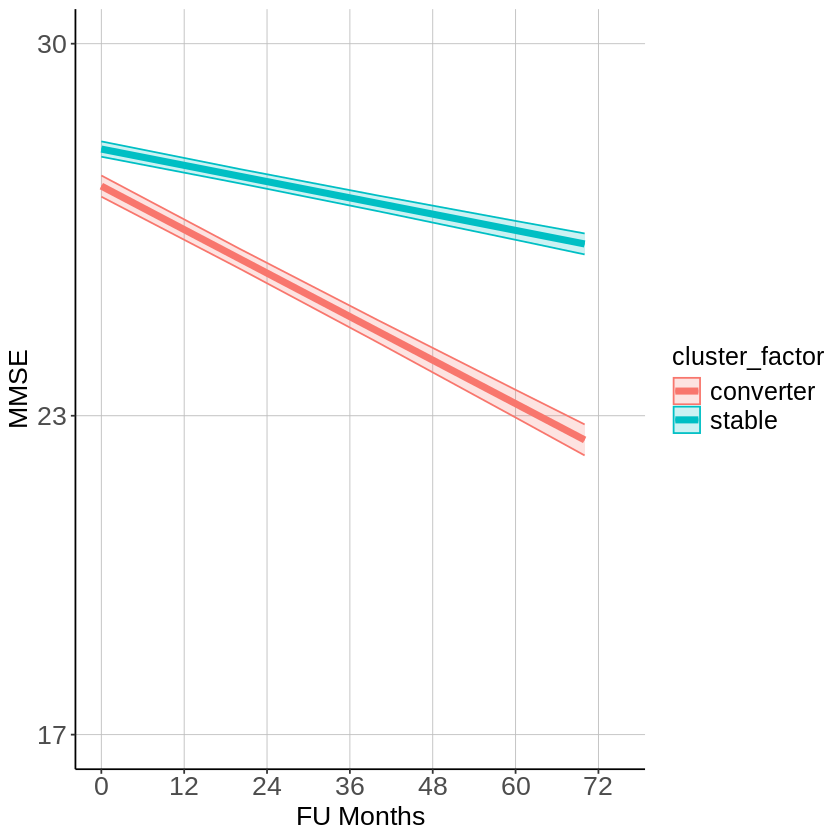

In [ ]:
###plot#########
effect112 <- effect(term = c('cluster_factor*FUMonths'),mod = MMSEmodel12, se = TRUE, confidence.level = .95)
ef112<- as.data.frame(effect112)


ggplot(ef112, aes(x=FUMonths, y=fit, color=cluster_factor, group=cluster_factor))+
 #geom_point(size=0.7) +
  geom_line(linewidth=0.9) +
  geom_ribbon(aes(ymin=lower, ymax=upper, fill =cluster_factor),alpha=0.2) +
  geom_smooth(method ="lm",size = 2, se = FALSE )+
  scale_x_continuous(
    breaks = c(0,12, 24, 36, 48, 60, 72),  # Set gridlines at specific points
    limits = c(0, 75)                    # Set the x-axis range between 0 and 75
  ) +
    scale_y_continuous(
    breaks = c(17, 23, 30),
    limits = c(17, 30)
  ) +
  labs(#title = "Hippocampus"),
    x= "FU Months", y="MMSE",
    color="cluster_factor", fill="cluster_factor") +
  theme_linedraw() +
  theme_light() +
  theme_classic()+
  theme(plot.title = element_text(size=19))+
  theme(
    axis.title.x = element_text(size = 16),
    axis.text.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 16)) +

  theme(legend.text = element_text(size=15),
        legend.title = element_text(size=15),
        panel.grid.major = element_line(color = "gray", size = 0.25),  # Major gridlines
        # panel.grid.minor = element_line(color = "lightgray", size = 0.25) # Minor gridlines
        )

`geom_smooth()` using formula = 'y ~ x'


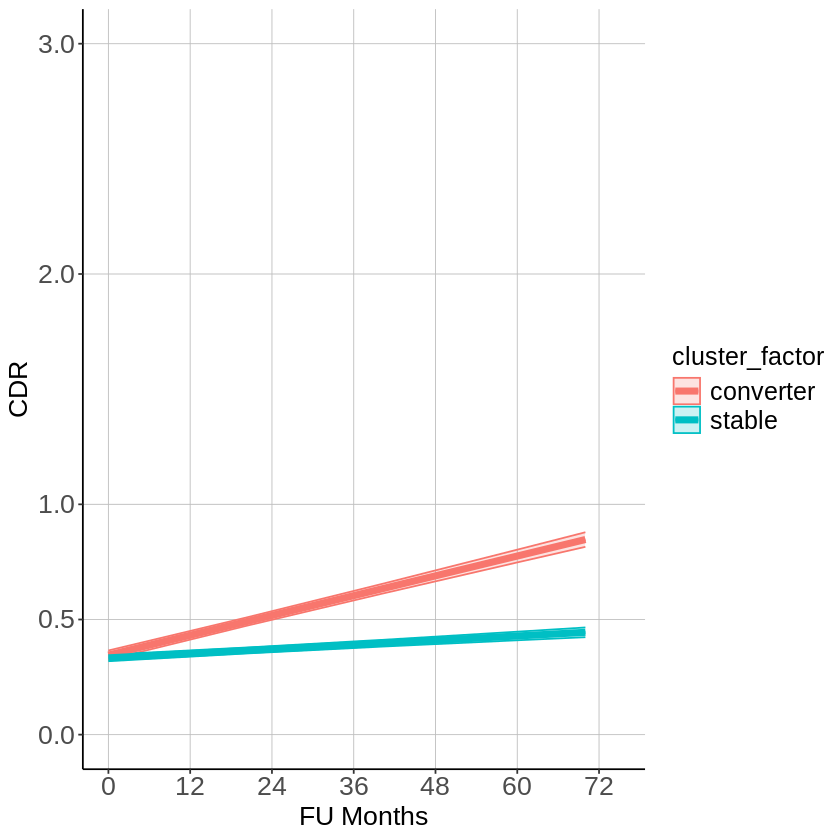

In [ ]:
###plot#########
effect12 <- effect(term = c('cluster_factor*FUMonths'),mod = CDRmodel12, se = TRUE, confidence.level = .95)
ef12<- as.data.frame(effect12)


ggplot(ef12, aes(x=FUMonths, y=fit, color=cluster_factor, group=cluster_factor))+
 #geom_point(size=0.7) +
  geom_line(linewidth=0.9) +
  geom_ribbon(aes(ymin=lower, ymax=upper, fill =cluster_factor),alpha=0.2) +
  geom_smooth(method ="lm",size = 2, se = FALSE )+
  scale_x_continuous(
    breaks = c(0,12, 24, 36, 48, 60, 72),  # Set gridlines at specific points
    limits = c(0, 75)                    # Set the x-axis range between 0 and 75
  ) +
    scale_y_continuous(
    breaks = c(0, 0.5, 1, 2, 3),
    limits = c(0, 3)
  ) +
  labs(#title = "Hippocampus"),
    x= "FU Months", y="CDR",
    color="cluster_factor", fill="cluster_factor") +
  theme_linedraw() +
  theme_light() +
  theme_classic()+
  theme(plot.title = element_text(size=19))+
  theme(
    axis.title.x = element_text(size = 16),
    axis.text.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 16)) +

  theme(legend.text = element_text(size=15),
        legend.title = element_text(size=15),
        panel.grid.major = element_line(color = "gray", size = 0.25),  # Major gridlines
        # panel.grid.minor = element_line(color = "lightgray", size = 0.25) # Minor gridlines
        )